# Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Load Data

In [2]:
# Read data:
data = pd.read_parquet("data/regression/insurance_preprocessed.parquet")

# Test/train Split

In [3]:
# Test/Train Split:
X = data.drop(["charges"], axis = 1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

# Fit Model

In [4]:
pipe = Pipeline([("regressor", RandomForestRegressor())])
param_grid = {"regressor__n_estimators": [100, 200, 500],
            "regressor__max_depth": [None, 10, 20, 30],
            "regressor__min_samples_split": range(2, 11, 2),
            "regressor__min_samples_leaf": range(1, 11, 2)}
grid_search = GridSearchCV(pipe, param_grid, cv = 5, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best Param: ", grid_search.best_params_)
model = grid_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Param:  {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 9, 'regressor__min_samples_split': 8, 'regressor__n_estimators': 100}


# Model Evaluation

In [5]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 22363073.98096031
RMSE: 4728.961194698082
R2 Score: 0.8436745706639737
MAE: 2643.818430153204
MAPE: 0.26815079392846597


# Visualize Model

Visualize the first estimator

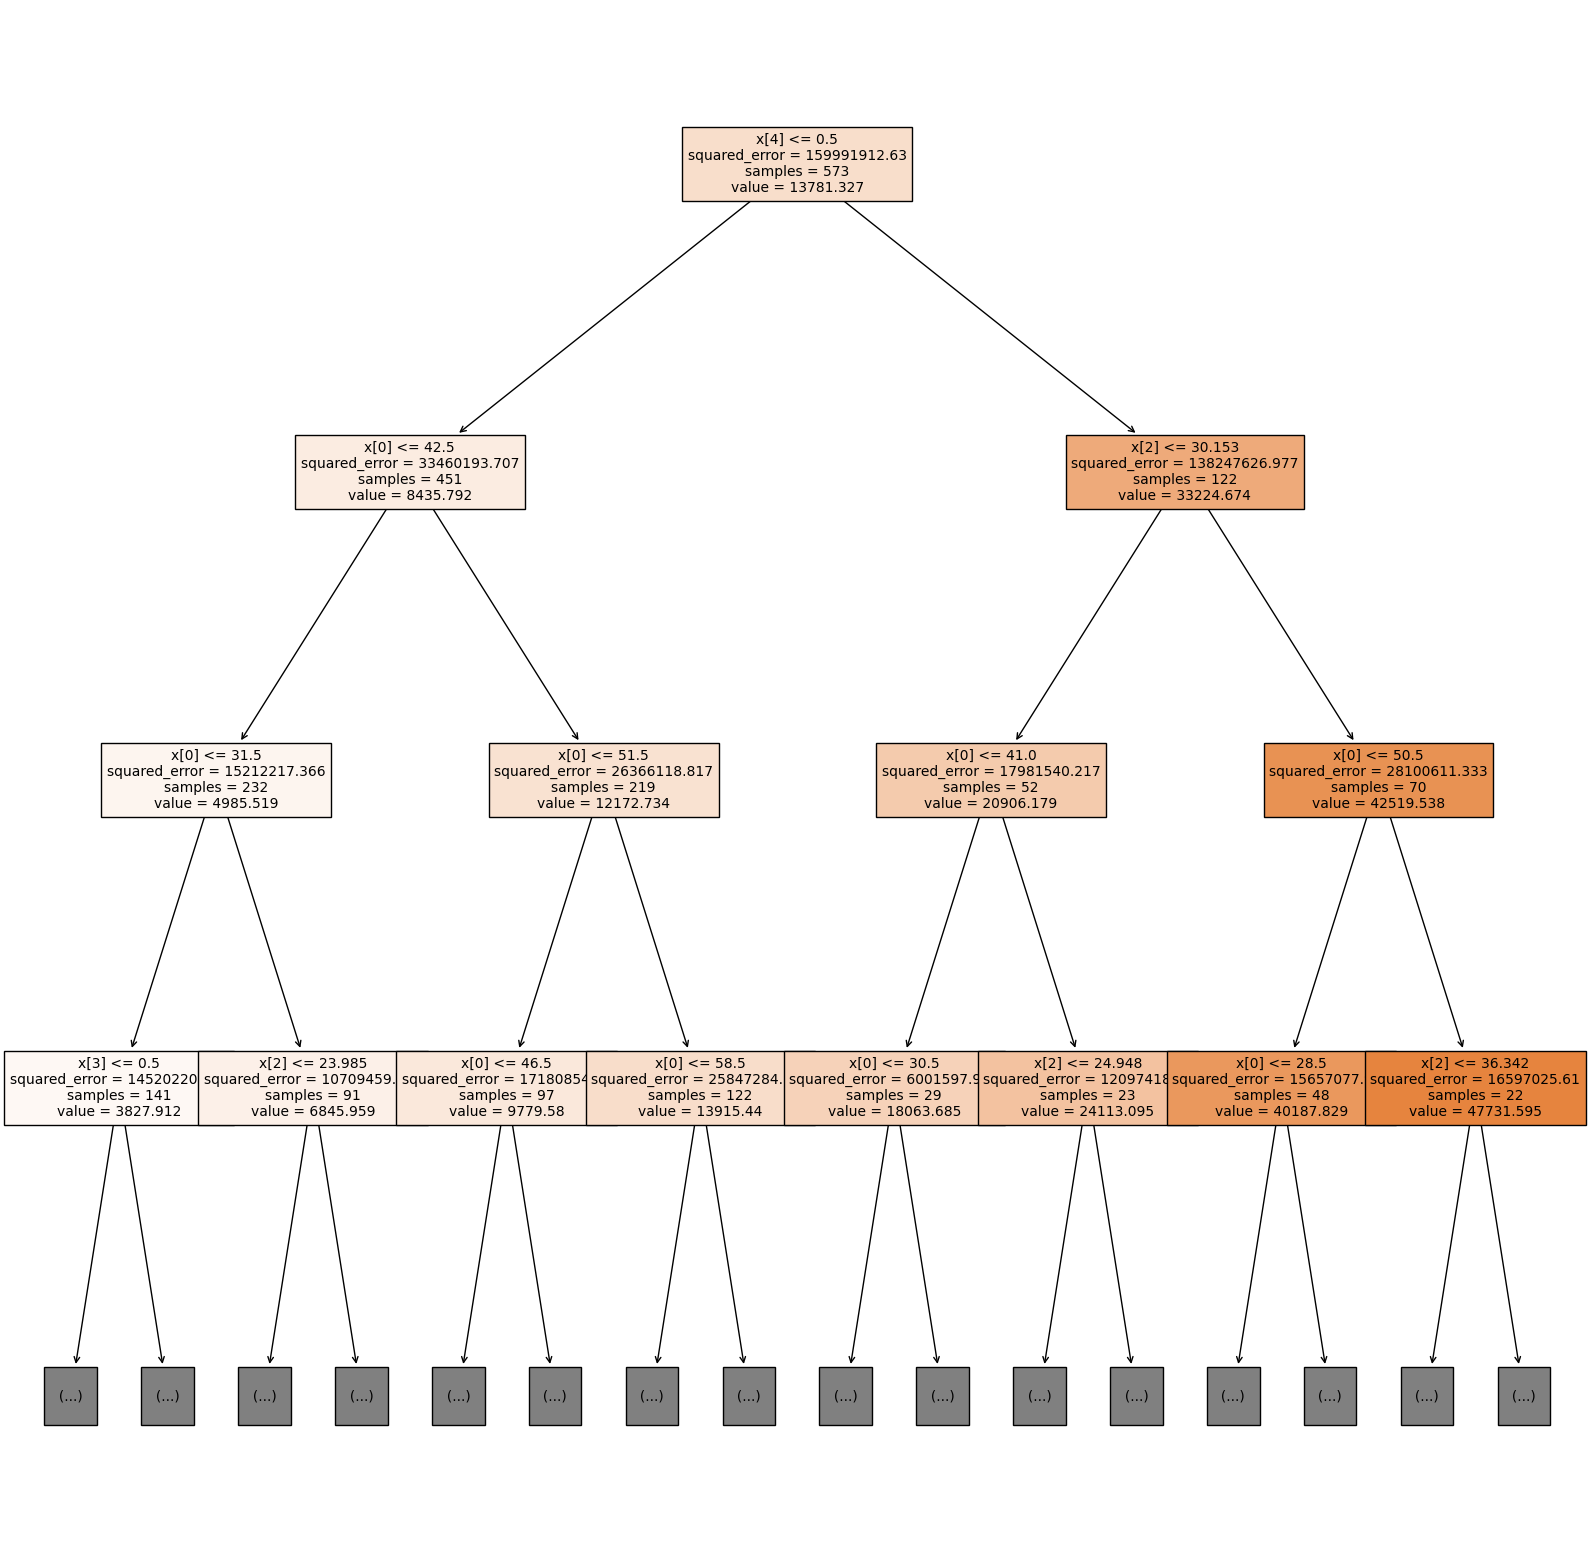

In [6]:
# Get the first estimator:
m = model.named_steps["regressor"]
m = m.estimators_[0]

fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(m, filled = True, ax = ax, max_depth = 3, fontsize = 10)
plt.show()